# Random forests for classification and regression
## Practical examples in R
### [Joaquín Bedia & Ana Casanueva]

## 1. Bagged random forests for classification

In this first part we get familiar with the `randomForest` package (Liaw and Wiener 2002) and the main components of a random forest object in R.

In [1]:
if (!require("randomForest")) {
    install.packages("randomForest")
} else {
    library("randomForest")
}

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



### Example 1: classification with the iris dataset

In [2]:
data(iris)

Dataset split for training and testing. The classical 70-30% partition is done:

In [3]:
n <- nrow(iris)
set.seed(1)
indtrain <- sample(1:n, round(0.7*n))  # indices for train
indtest <- setdiff(1:n, indtrain)  # indices for test

In [4]:
rf <- randomForest(Species ~., iris , subset = indtrain)


***

**Exploring the RF object structure. Questions:**
1. How many trees form the random forest?

`rf$ntree` = 500

2. How many predictors are sampled to grow each tree?

`rf$mtry` = 2

3. How many samples are drawn to grow each tree?

`nrow(iris[,-1])` = 150 porque `replace = True`

4. Can you provide an indication of the relative importance of each explanatory variable?
5. How is variable importance measured?

***

In [5]:
pred <- predict(rf, iris[indtest, ])
(accuracy <- sum(diag(table(pred, iris$Species[indtest]))) / length(indtest))

[1] 0.9555556

### Comparison of the Random forest against a single tree:

In [6]:
library(tree)
myTree <- tree(Species ~., iris, subset = indtrain)
# prediction for test
pred.t <- predict(myTree, iris[indtest, ], type = "class")
accuracy.tree <- sum(diag(table(pred.t, iris$Species[indtest]))) / length(indtest)
accuracy.tree

[1] 0.9111111

Using exactly the same data, the Random Forest yields a higher predictive accuracy!

### Out-of-bag error

For each bootstrap sample taken from the training data, there will be samples left behind that were not included. These samples are called Out-Of-Bag samples (OOB). When averaged over all trees, the predictive performance on OOB samples provides a good estimate of the test error that may be expected.

The study of error estimates for bagged classifiers in [Breiman 1996](https://www.stat.berkeley.edu/~breiman/OOBestimation.pdf), gives empirical evidence to show that the out-of-bag estimate is as accurate as using a test set of the same size as the training set. **Therefore, using the out-of-bag error estimate can be as useful as a sepparate test set for model assessment purposes.**


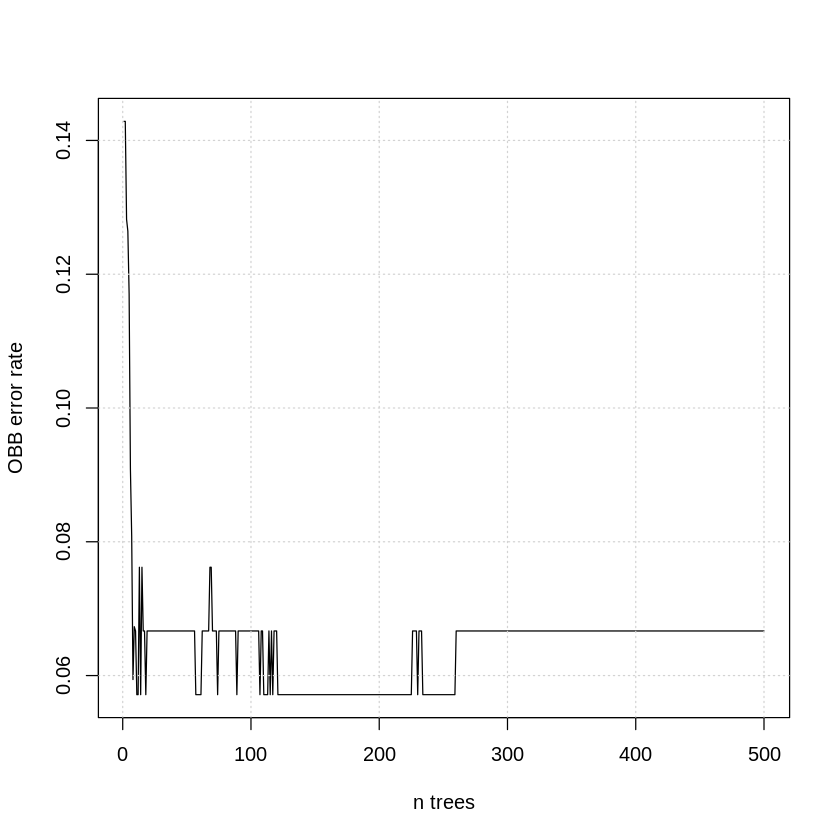

In [7]:
plot(rf$err.rate[, 1], type = "l", xlab = "n trees", ylab = "OBB error rate")
grid()

Looking into the error rates more in detail, it is possible to ascertain its different components:

In [21]:
str(rf$err.rate)

 num [1:500, 1:4] 0.143 0.143 0.128 0.126 0.117 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "OOB" "setosa" "versicolor" "virginica"


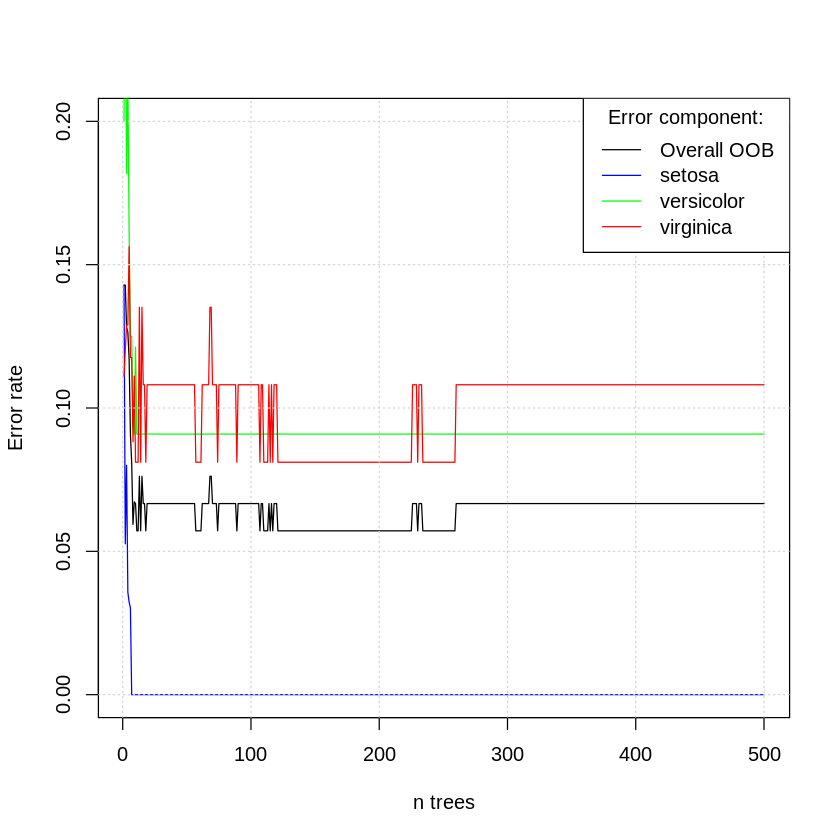

In [22]:
plot(rf$err.rate[, 1], type = "l", xlab = "n trees", ylab = "Error rate",ylim=c(0,0.2))
lines(rf$err.rate[,2], col = "blue")
lines(rf$err.rate[,3], col = "green")
lines(rf$err.rate[,4], col = "red")
grid()
legend("topright", title="Error component:", c("Overall OOB", "setosa", "versicolor", "virginica"), lty = 1, col = c("black", "blue", "green", "red"))

***
**Questions** 

6. What can you say after inspecting the above plot?

7. From the OOB error plot above, how many trees would you use for the random forest?
    
***

There are other parameters that have an important effect on the resulting predictive ability of the random forest. Three important ones are the number of trees forming the forest (argument `ntree`, as already seen), the number of samples taken in the bootstrapping procedure (`sampsize`) and the number of variables included as predictors in each bootstrap iteration (`mtree`). An example on how to decide suitable parameter values is shown in the next section.

### Example 2: Classification with the `meteo` dataset

Here, we will use the `meteo` dataset. The first column of the `meteo` dataset is the predictand (daily precipitation amount, in mm), and the rest of columns are the predictors, in blocks of 40 neighbouring locations corresponding to 8 different predictors. It contains a continuous record of 10958 days. For convenience, the data are next divided into predictand (first column) and predictors, and reduced to a subset of 1000 days to speed-up calculations. Furthermore, precipitation amount is converted to the binary variables rain/no rain for classification, considering a precipitation threshold of 1 mm. Afterwards, a new dataset is created:

In [26]:
meteo <- read.table("/home/jovyan/04-DataMining/Data/meteo.csv", header = TRUE, sep = ",", row.names = 1)

In [32]:
y <- meteo[1:1000, 1]  ## Predictando
x <- meteo[1:1000, -1]  ## Predictores

# binary occurrence (1/0)
occ <- y
occ[which(y < 1)] <- 0
occ[which(y >= 1)] <- 1

# Occurrence dataset:
df.occ <- data.frame(y.bin = as.factor(occ), predictors = x)

In [33]:
str(meteo)

'data.frame':	10958 obs. of  321 variables:
 $ y   : num  10.9 0.6 13 0 0 1.2 1.1 0 0 0.7 ...
 $ X1  : num  57043 56963 56523 54628 53584 ...
 $ X2  : num  56535 56493 55971 53980 53391 ...
 $ X3  : num  55884 55931 55304 53494 53310 ...
 $ X4  : num  55176 55340 54498 53073 53293 ...
 $ X5  : num  54458 54769 53725 52616 53340 ...
 $ X6  : num  56980 56857 56515 54776 53782 ...
 $ X7  : num  56461 56362 55978 54089 53498 ...
 $ X8  : num  55800 55777 55327 53517 53307 ...
 $ X9  : num  55051 55164 54570 53013 53213 ...
 $ X10 : num  54319 54585 53863 52501 53157 ...
 $ X11 : num  56900 56724 56467 54908 54015 ...
 $ X12 : num  56368 56187 55965 54205 53674 ...
 $ X13 : num  55721 55587 55360 53594 53378 ...
 $ X14 : num  54946 54947 54646 53021 53200 ...
 $ X15 : num  54145 54367 53999 52451 53055 ...
 $ X16 : num  56816 56568 56401 55059 54327 ...
 $ X17 : num  56257 55987 55902 54295 53911 ...
 $ X18 : num  55559 55360 55339 53657 53529 ...
 $ X19 : num  54788 54690 54720 53074 5326

The dataset is split into train and test subsets:

In [39]:
set.seed(1)
indtrain <- sample(1:n, round(0.75*n))  # indices for train
indtest <- setdiff(1:n, indtrain)  # indices for test

In [40]:
rf <- randomForest(y.bin ~., df.occ, subset = indtrain)

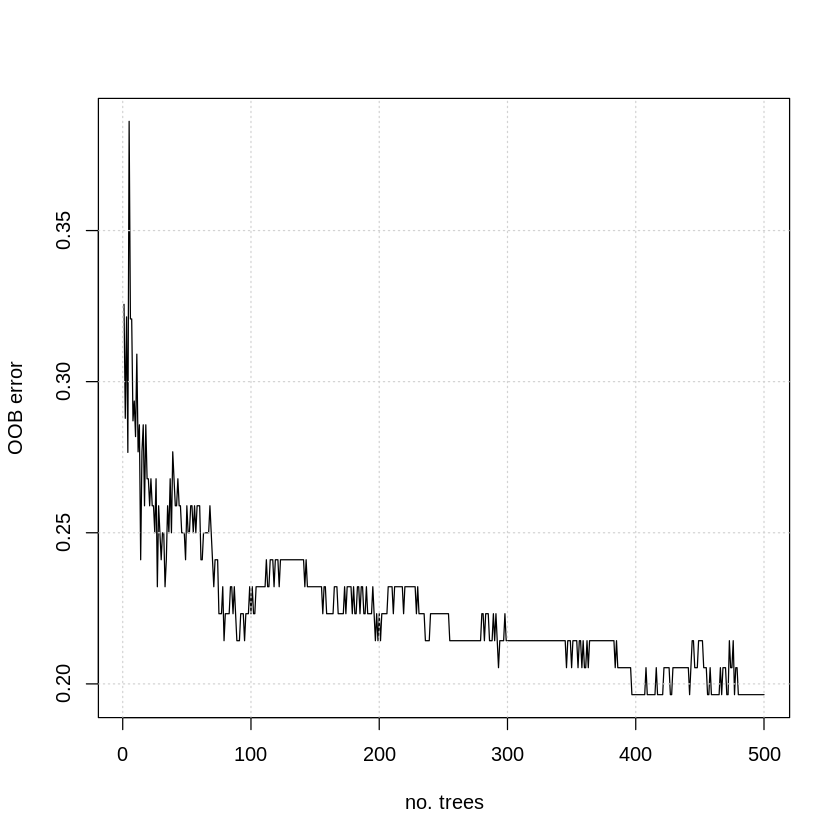

In [41]:
plot(rf$err.rate[, 1], type = "l", xlab = "no. trees", ylab = "OOB error")
grid()

In [42]:
pred <- predict(rf, df.occ[indtest, ])
1 - sum(diag(table(pred, df.occ$y.bin[indtest]))) / length(indtest)  # error (1-accuracy)

[1] 0.1315789

### Fitting the optimum number of predictors (`mtry` parameter): 

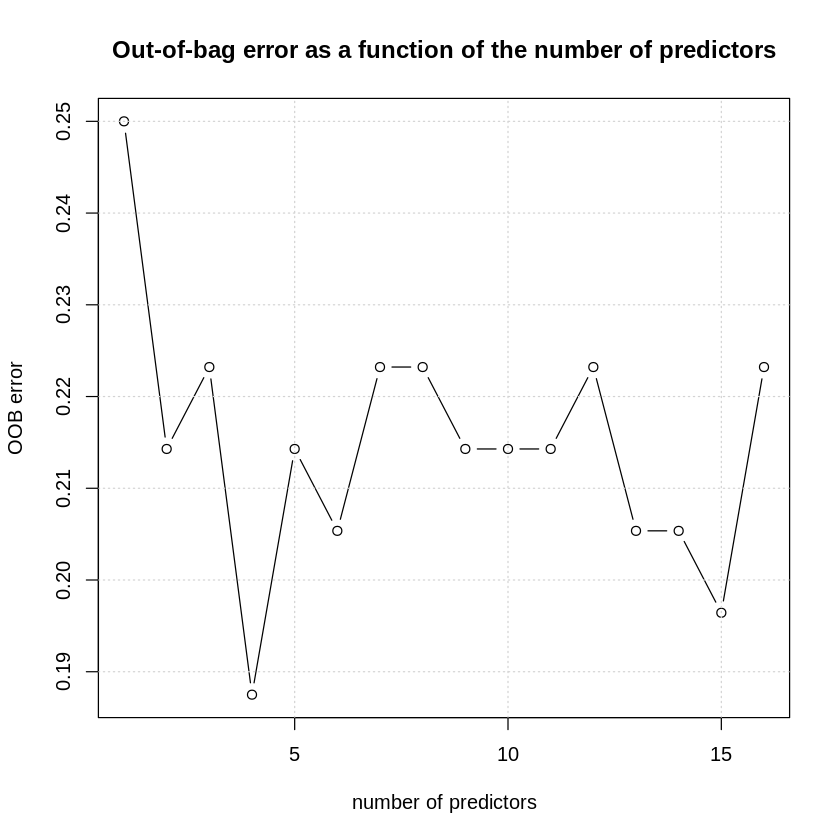

In [38]:
# Optimal number of trees is that minimizing the OOB error:
ntree.optim <- which.min(rf$err.rate[,1])

# Next, we search for the `mtry` value attaining minimum error:
mtry.choices <- 2:17
err <- vector("numeric", length(mtry.choices))
for (i in 1:length(mtry.choices)) {
    rf1 <- randomForest(y.bin ~., df.occ, subset = indtrain, ntree = ntree.optim, mtry = mtry.choices[i])
    pred1 <- predict(rf1, df.occ[indtest, ])
    err[i] <- rf1$err.rate[ntree.optim, 1]
}
plot(err, ty = "b", ylab = "OOB error", xlab = "number of predictors")
grid()
title(main = "Out-of-bag error as a function of the number of predictors")


In [45]:
## results for optimum RF
mtry.best <- which.min(err)  # minimum OOB error
rf.best <- randomForest(y.bin ~., df.occ, subset = indtrain, ntree = ntree.optim, mtry = mtry.best)

The OOB error in this case:

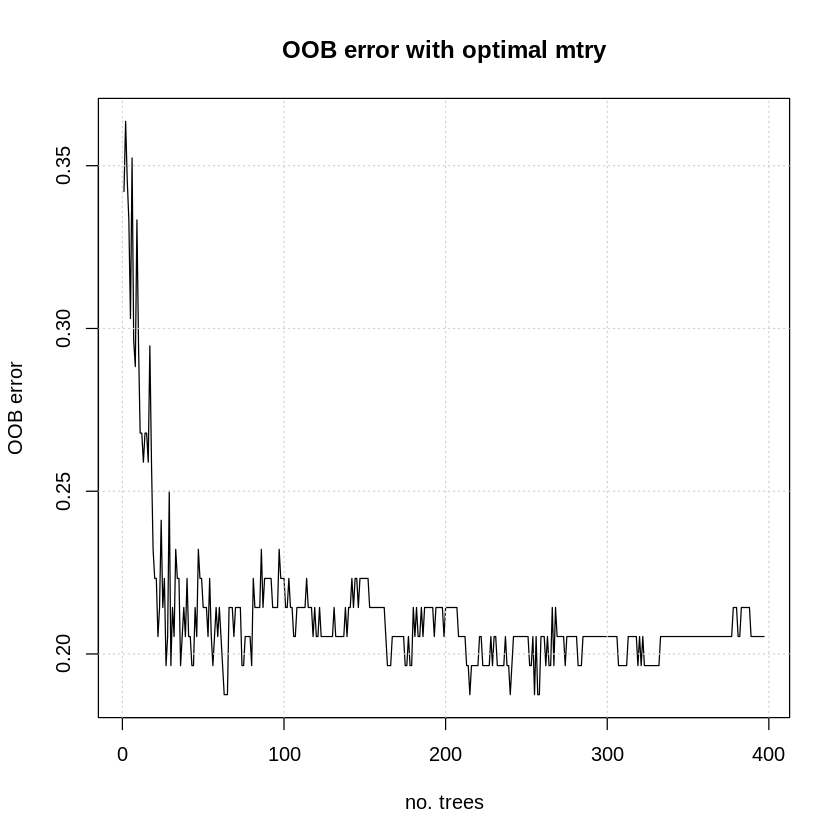

In [46]:
plot(rf.best$err.rate[, 1], type = "l", xlab = "no. trees", ylab = "OOB error", main = "OOB error with optimal mtry")
grid()

***

**Tuning the RF parameters. Questions:**

8. Following the example above, can you provide an optimal value for the bootstrapping sample size (`sampsize`) parameter?

`ntree.optim`

9. Build a new random forest with all the estimated "optimal" parameters, providing a performance assessment (error rates and accuracy).

10. Compare the classification accuracy of this random forest with the random forests that uses default parameters, and alternative choices with differente parameter values. Is it possible to see a significant improvement after having determined the best parameter values?

***

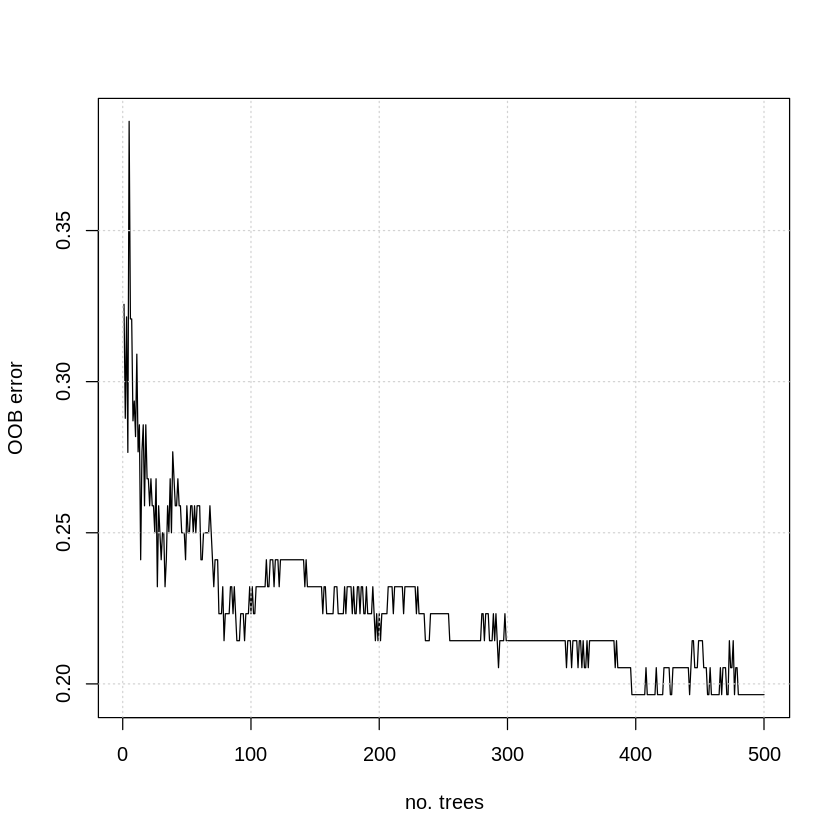

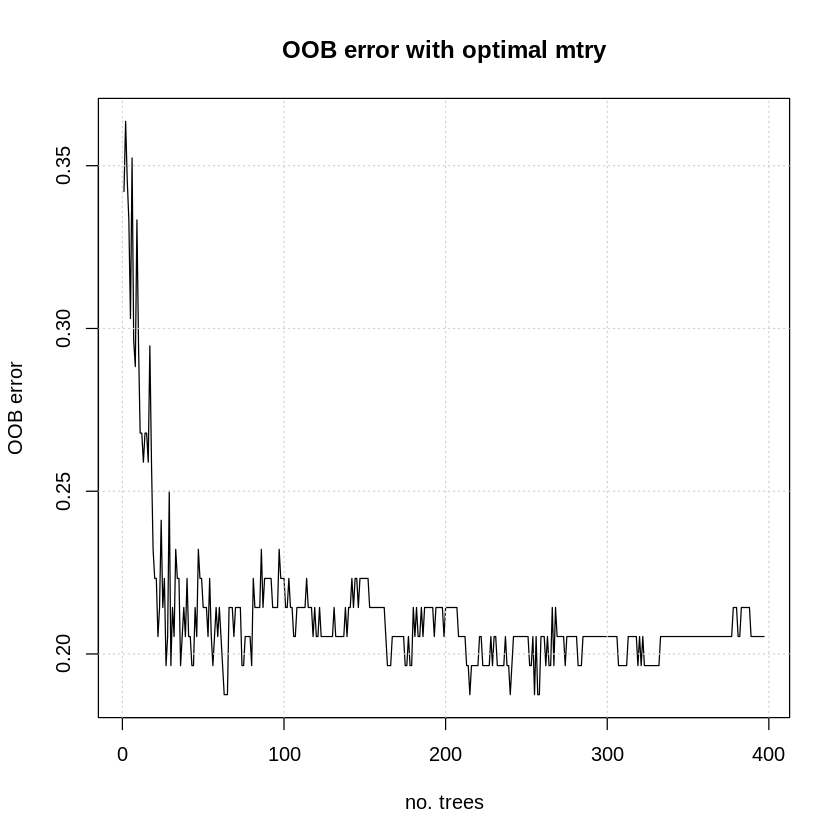

In [51]:
#10 
par(mfrow = c(1,1))
plot(rf$err.rate[, 1], type = "l", xlab = "no. trees", ylab = "OOB error")
grid()
plot(rf.best$err.rate[, 1], type = "l", xlab = "no. trees", ylab = "OOB error", main = "OOB error with optimal mtry")
grid()


## 2. Bagged Random forests for regression

### Example 3: regression with the Boston dataset

In [52]:
library(MASS)
n <- nrow(Boston) # train/test partition
indtrain <- sample(1:n, round(0.75*n))  # indices for train
indtest <- setdiff(1:n, indtrain) # indices for test

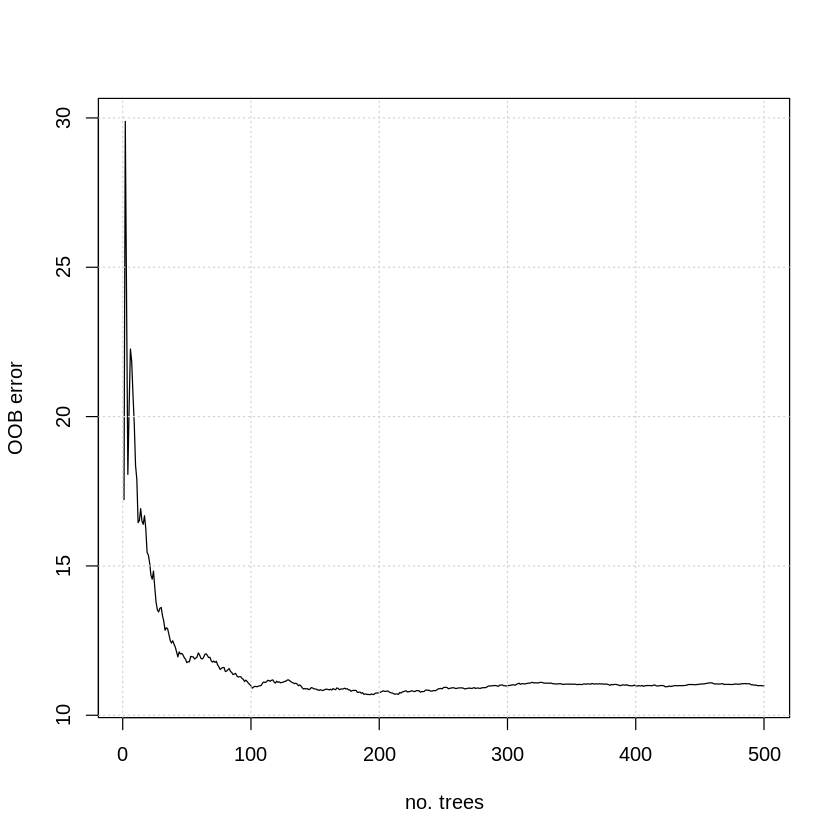

In [53]:
rf <- randomForest(medv ~., Boston , subset = indtrain)
plot(rf$mse, type = "l", xlab = "no. trees", ylab = "OOB error")
grid()

***

**Questions**:

1. What is the measure of OOB error in the regression forest?
1. Build a random forest for regression optimizing the number of predictors for tree
2. Build a plot displaying the relative importance of each predictor
3. How is here variable importance measured?

***

## 3. Boosted trees. Adabag method

### Example 4: Boosted trees for classification with the `meteo` dataset

We illustrate gradient boosting using the `adabag` package (Alfaro y García 2013). We use the `meteo` dataset again, as previously pre-processed in Example 2. This is a brief example on how to apply adabag, that will be extended during the gradient boosting lab session.

In [74]:
if (!require("adabag")) install.packages("adabag")
library("adabag")

In [75]:
ab <- boosting(y.bin ~., df.occ[indtrain, ], mfinal = 20)

The function `errorevol`caclulates how the classification/prediction error evolves as the ensemble size grows.

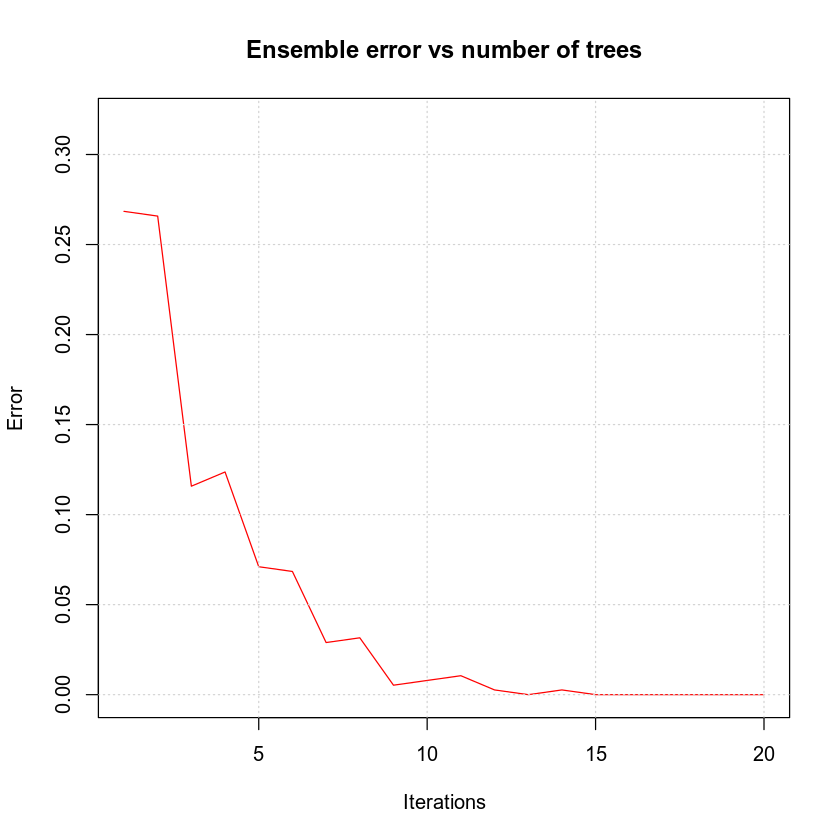

In [76]:
plot(errorevol(ab, df.occ[indtrain, ]))
grid()

It is possible to extract individual trees generated during the boosting procedure to investigate the process:

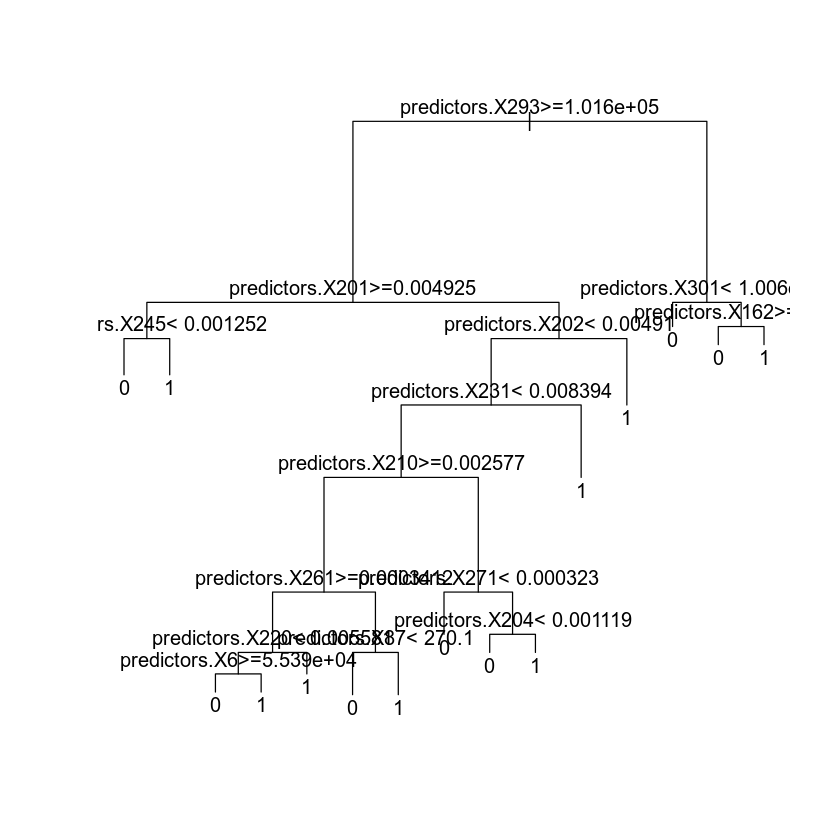

In [77]:
plot(ab$trees[[1]])
text(ab$trees[[1]])

We next depict the sequential tree generation by displaying some intermediate trees from the first to the 20th:

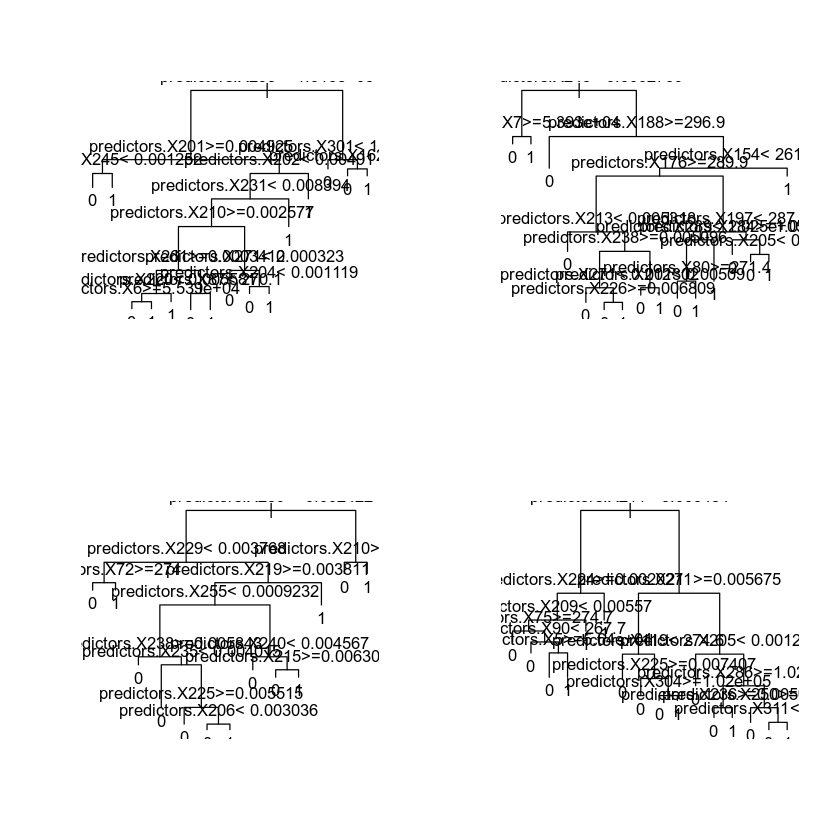

In [78]:
par(mfrow=c(2,2))
for (i in c(1,5,10,20)) {
    plot(ab$trees[[i]])
    text(ab$trees[[i]]) 
}

Finally, we obtain the prediction error (as 1-accuracy):

In [79]:
## prediction for test
pred.ab <- predict(ab, df.occ[indtest, ])
# test error
1 - sum(diag(table(pred.ab$class, df.occ$y.bin[indtest]))) / length(indtest)

[1] 0.4365079

## References

 * Alfaro, E., Gamez, M. Garcia, N.(2013). adabag: An R Package for Classification with Boosting
  and Bagging. Journal of Statistical Software, 54(2), 1-35. URL
  http://www.jstatsoft.org/v54/i02/.
  
 * Liaw, A. and Wiener, M. (2002). Classification and Regression by randomForest. R News 2(3),
  18--22.

## Session info

In [80]:
print(sessionInfo())

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/juaco/miniconda3/envs/atlas/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] adabag_4.2          doParallel_1.0.16   iterators_1.0.13   
 [4] foreach_1.5.1       caret_6.0-88        ggplot2_3.3.5      
 [7] lattice_0.20-44     rpart_4.1-15        MASS_7.3-54        
[10] tree_1.0-40         randomForest_4.6-14

loaded via a namespace (and not attached):
 [1] pbd